In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns



In [ ]:

# Cargar archivos
df_mujeres = pd.read_csv('datasets/mujeres.csv')
df_sni = pd.read_excel('datasets/SNI2025.xlsx')

# Normalizar lista de nombres de mujeres
lista_mujeres = set(df_mujeres['nombre'].str.strip().str.lower())

# Detectar la columna de nombres automáticamente
columna_nombres = [col for col in df_sni.columns if 'INVESTIGADOR' in col.upper()][0]

# Función para clasificar usando todo el nombre completo
def clasificar_genero_nombre_completo(nombre_completo):
    if pd.isna(nombre_completo):
        return "DESCONOCIDO"
    partes = nombre_completo.strip().lower().split()
    for parte in partes:
        if parte in lista_mujeres:
            return "MUJER"
    return "HOMBRE"

# Clasificación usando solo el tercer nombre como referencia
#df_sni['PRIMER_NOMBRE'] = df_sni[columna_nombres].str.strip().str.split().str[2].str.lower()
#df_sni['GENERO_POR_TERCER_NOMBRE'] = df_sni['PRIMER_NOMBRE'].apply(lambda x: "MUJER" if x in lista_mujeres else "HOMBRE")

# Clasificación usando coincidencia en todo el nombre
df_sni['GENERO'] = df_sni[columna_nombres].apply(clasificar_genero_nombre_completo)

# Guardar resultados
df_sni.to_excel('datasets/SNI2025_CLASIFICADO.xlsx', index=False)

# Mostrar conteos
#print(df_sni['GENERO_POR_TERCER_NOMBRE'].value_counts())
print(df_sni['GENERO'].value_counts())


In [13]:
# Cargar el archivo SNI 2025 clasificado
df = pd.read_excel('datasets/SNI2025_CLASIFICADO.xlsx')

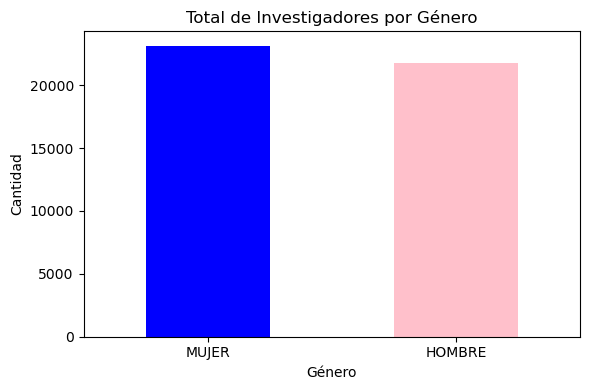

GENERO
MUJER     23126
HOMBRE    21763
Name: count, dtype: int64


In [14]:
df_hombres = df[df['GENERO'] == 'HOMBRE']
df_mujeres = df[df['GENERO'] == 'MUJER']

# Gráfico 1: Conteo general por género
df['GENERO'].value_counts().plot(kind='bar', color=['blue', 'pink'], figsize=(6,4))
plt.title('Total de Investigadores por Género')
plt.ylabel('Cantidad')
plt.xlabel('Género')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print (df['GENERO'].value_counts())


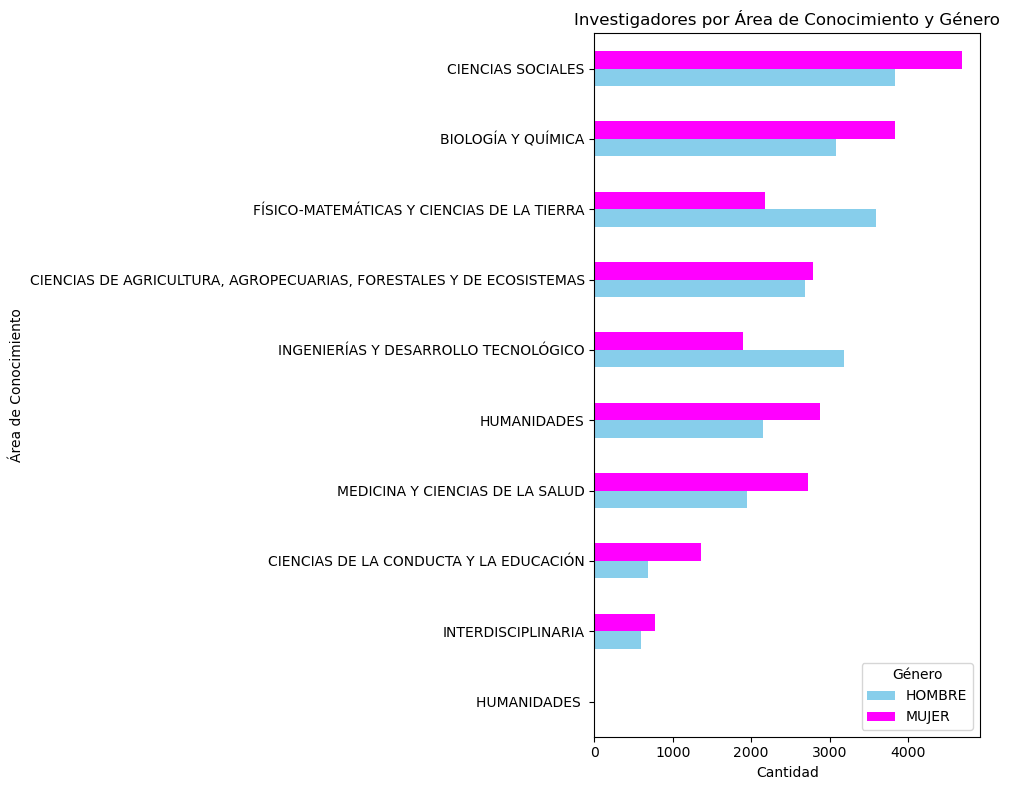

GENERO                                              HOMBRE  MUJER
ÁREA DE CONOCIMIENTO                                             
HUMANIDADES                                              1      2
INTERDISCIPLINARIA                                     597    778
CIENCIAS DE LA CONDUCTA Y LA EDUCACIÓN                 684   1362
MEDICINA Y CIENCIAS DE LA SALUD                       1950   2730
HUMANIDADES                                           2154   2875
INGENIERÍAS Y DESARROLLO TECNOLÓGICO                  3185   1892
CIENCIAS DE AGRICULTURA, AGROPECUARIAS, FORESTA...    2680   2790
FÍSICO-MATEMÁTICAS Y CIENCIAS DE LA TIERRA            3589   2182
BIOLOGÍA Y QUÍMICA                                    3084   3831
CIENCIAS SOCIALES                                     3839   4684


In [15]:
# Gráfico 2: Hombres/mujeres por Área de Conocimient
conteo_area = df.groupby(['ÁREA DE CONOCIMIENTO', 'GENERO']).size().unstack(fill_value=0)
# Ordenar áreas por total general si quieres
conteo_area = conteo_area.loc[conteo_area.sum(axis=1).sort_values(ascending=True).index]
conteo_area.plot(kind='barh', figsize=(10,8), color=['skyblue', 'magenta'])
plt.title('Investigadores por Área de Conocimiento y Género')
plt.xlabel('Cantidad')
plt.ylabel('Área de Conocimiento')
plt.legend(title='Género', loc='lower right')
plt.tight_layout()
plt.show()

print(conteo_area)


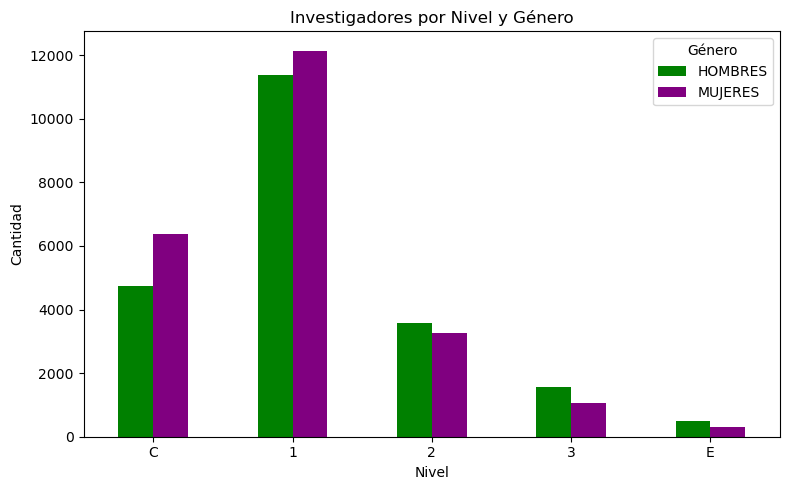

       HOMBRES  MUJERES
NIVEL                  
C         4729     6365
1        11387    12142
2         3586     3248
3         1572     1073
E          489      298


In [16]:
# Gráfico 3: Hombres por Nivel
orden_niveles = ['C','1', '2', '3', 'E']

# Conteo para hombres y mujeres asegurando el mismo orden
nivel_hombres = df_hombres['NIVEL'].astype(str).value_counts().reindex(orden_niveles).fillna(0)
nivel_mujeres = df_mujeres['NIVEL'].astype(str).value_counts().reindex(orden_niveles).fillna(0)

# Combinar en un solo DataFrame
niveles_df = pd.DataFrame({
    'HOMBRES': nivel_hombres,
    'MUJERES': nivel_mujeres
})

niveles_df.plot(kind='bar', figsize=(8,5), color=['green', 'purple'])
plt.title('Investigadores por Nivel y Género')
plt.xlabel('Nivel')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(title='Género')
plt.tight_layout()
plt.show()

print(niveles_df)



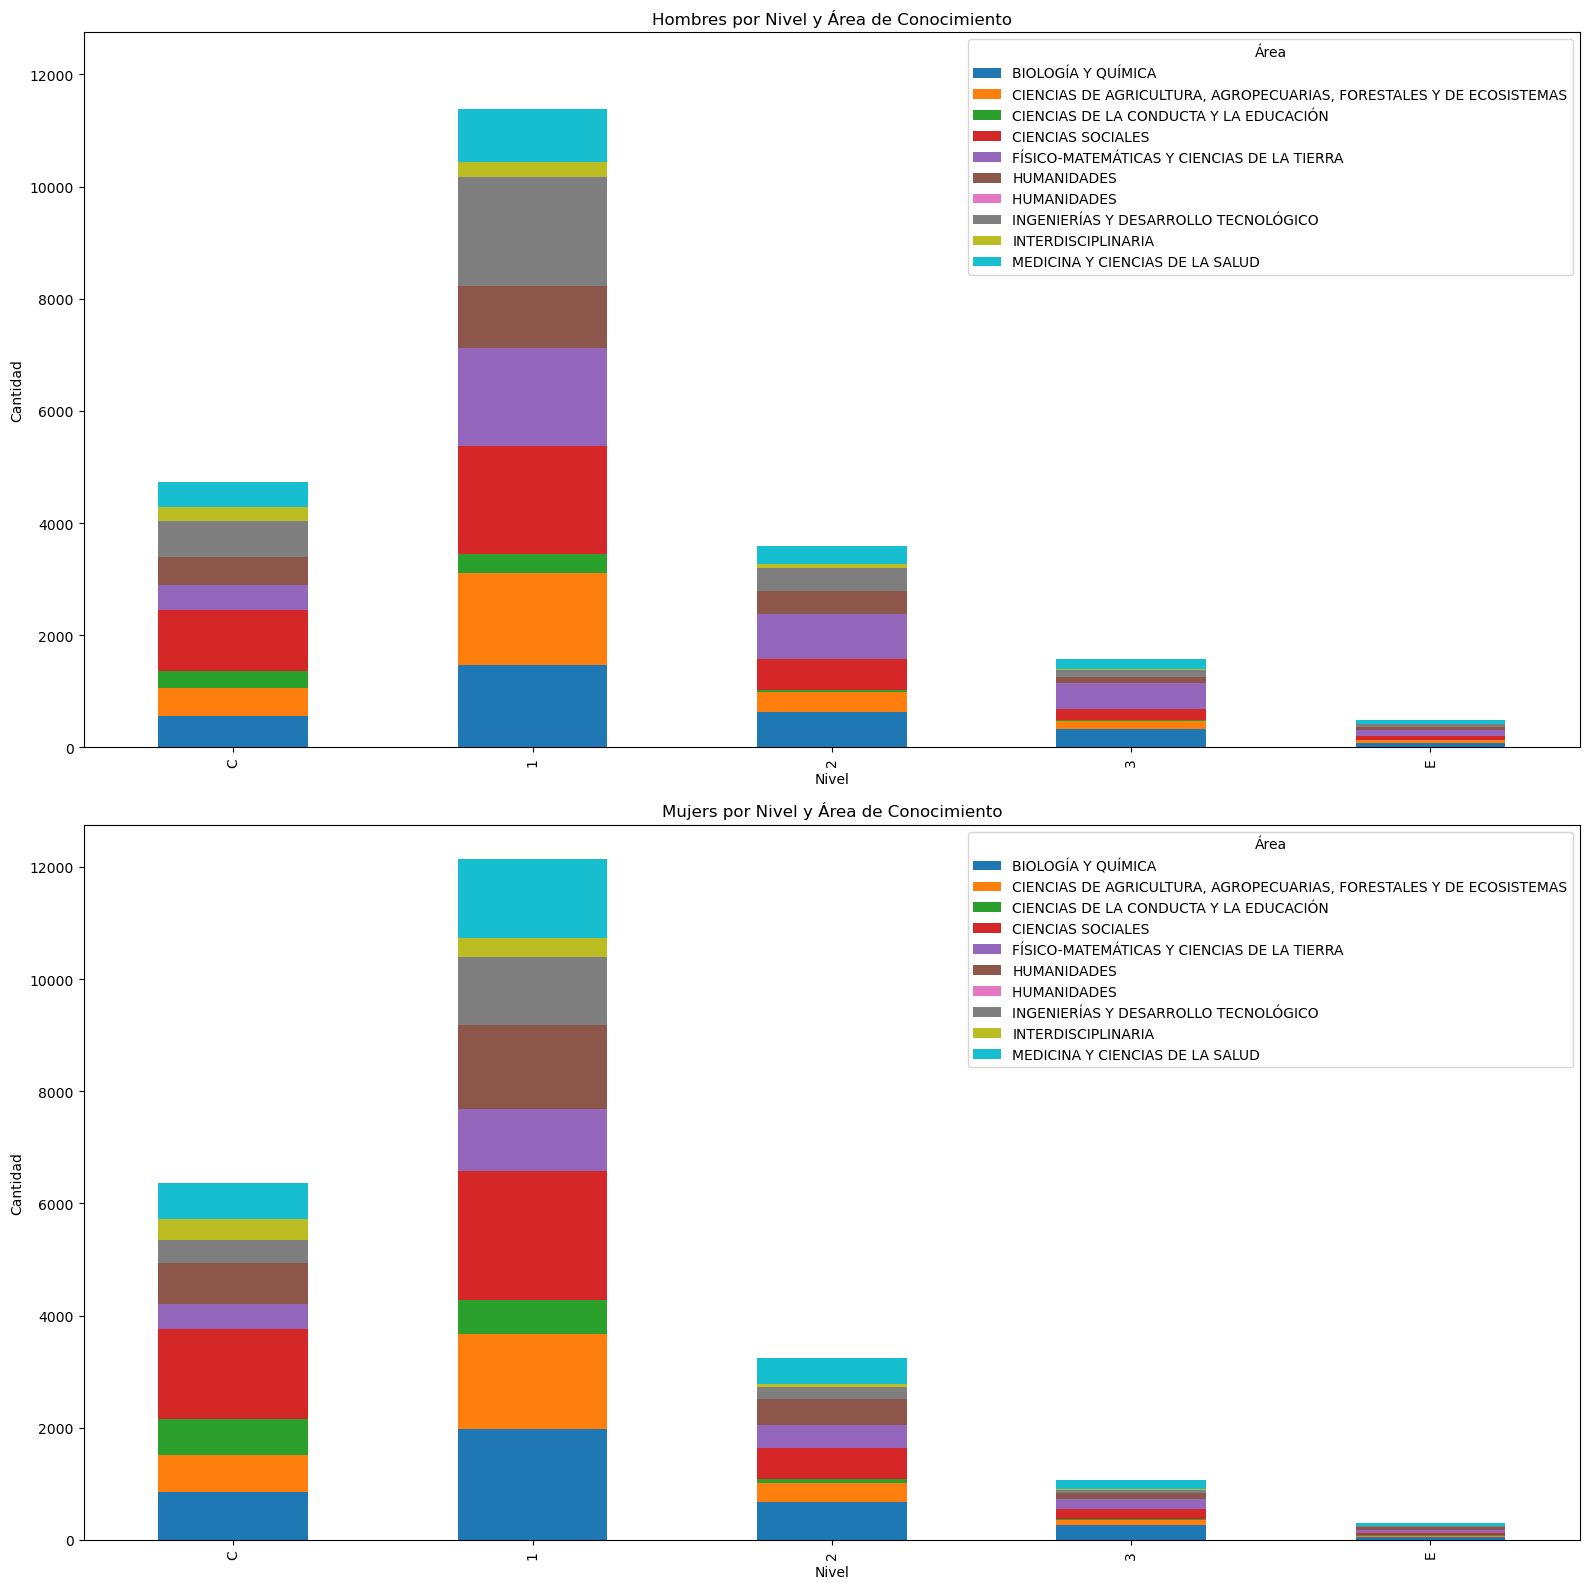

ÁREA DE CONOCIMIENTO  BIOLOGÍA Y QUÍMICA  \
NIVEL GENERO                               
1     HOMBRE                        1468   
      MUJER                         1974   
2     HOMBRE                         641   
      MUJER                          674   
3     HOMBRE                         331   
      MUJER                          269   
C     HOMBRE                         561   
      MUJER                          855   
E     HOMBRE                          83   
      MUJER                           59   

ÁREA DE CONOCIMIENTO  CIENCIAS DE AGRICULTURA, AGROPECUARIAS, FORESTALES Y DE ECOSISTEMAS  \
NIVEL GENERO                                                                                
1     HOMBRE                                                       1647                     
      MUJER                                                        1692                     
2     HOMBRE                                                        340                     
      

In [23]:

# Aseguramos que NIVEL es str
df['NIVEL'] = df['NIVEL'].astype(str)

# Agrupar por Nivel (str), Género y Área de Conocimiento
tabla = pd.crosstab(
    index=[df['NIVEL'], df['GENERO']],
    columns=df['ÁREA DE CONOCIMIENTO']
)

# Niveles de interés en formato str:
niveles = ['C','1', '2', '3', 'E']
generos = ['HOMBRE', 'MUJER']

fig, axes = plt.subplots(2, 1, figsize=(16, 16), sharey=True)

for i, genero in enumerate(generos):
    # Usamos .loc con tuples, no con listas directamente
    index_values = [(nivel, genero) for nivel in niveles if (nivel, genero) in tabla.index]
    if not index_values:
        continue  # Por si no hay datos de ese género
    
    data = tabla.loc[index_values]
    # Reindex para asegurarse de que falten niveles aparezcan con 0
    data = data.reindex(pd.Index(index_values, name=tabla.index.names)).fillna(0)
    # Eliminar nivel de multiindex
    data.index = [x[0] for x in index_values]

    data.plot(
        kind='bar',
        stacked=True,
        ax=axes[i],
        title=f'{genero.capitalize()}s por Nivel y Área de Conocimiento'
    )
    axes[i].set_xlabel('Nivel')
    axes[i].set_ylabel('Cantidad')
    axes[i].legend(title='Área')

plt.tight_layout()
plt.show()

print(tabla)
